In [4]:
import os
print(os.getcwd())


C:\Users\SHRIHITA RANVEERKAR


In [7]:
import os
os.chdir('C:/Users/SHRIHITA RANVEERKAR')


In [8]:
%run "C:/Users/SHRIHITA RANVEERKAR/video_resolution_enhancer.py"


Exception: File `'C:/Users/SHRIHITA RANVEERKAR/video_resolution_enhancer.py'` not found.

In [3]:
!pip install opencv-python keras numpy tensorflow

%run video_resolution_enhancer.py



Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/895.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/895.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/895.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/895.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/895.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/895.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/895.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/895.7 kB ? eta -:--:--
   ---------------------- --------------- 524.3/895.7 kB 419.4 kB/s eta 0:00:01
   ---------------------- --------------- 524.3/895.7 kB 419.4 kB/s eta 0:00:01
   --------------------------------- ---- 786.4/895.7 kB 472.8 kB/s eta 0:00:01
   -------------------------------------- 895.7/895.7 kB 513.4 kB/s eta 0:00:00
  Attempting uninstall: prot

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboardx 2.6.2.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.16.1 requires keras>=3.0.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.16.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.16.1 requires tensorboard<2.17,>=2.16, but you have tensorboard 2.10.1 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Exception: File `'video_resolution_enhancer.py'` not found.

In [1]:
import cv2
import numpy as np
from keras.models import load_model

# Load the pre-trained SRGAN model
def load_srgan_model(model_path):
    try:
        model = load_model(model_path)
        print("SRGAN model loaded successfully.")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        exit()

# Enhance resolution of a single frame
def enhance_frame(srgan_model, frame):
    # Resize to the model's expected input size
    input_frame = cv2.resize(frame, (64, 64))  # Replace (64, 64) with your SRGAN model's input size
    input_frame = input_frame / 255.0  # Normalize to [0, 1]
    input_frame = np.expand_dims(input_frame, axis=0)  # Add batch dimension

    # Predict high-resolution frame
    enhanced_frame = srgan_model.predict(input_frame)
    enhanced_frame = np.squeeze(enhanced_frame, axis=0)  # Remove batch dimension
    enhanced_frame = np.clip(enhanced_frame * 255.0, 0, 255).astype('uint8')  # Scale back to [0, 255]

    return enhanced_frame

# Process video frame by frame
def process_video(input_video_path, output_video_path, srgan_model):
    # Load input video
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Unable to open input video.")
        exit()

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Define codec and create VideoWriter object
    out = cv2.VideoWriter(
        output_video_path,
        cv2.VideoWriter_fourcc(*'XVID'),  # Codec
        fps,
        (frame_width * 4, frame_height * 4)  # Output resolution (4x scaling for SRGAN)
    )

    print(f"Enhancing resolution of {frame_count} frames...")

    frame_index = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Enhance frame resolution
        try:
            enhanced_frame = enhance_frame(srgan_model, frame)
            enhanced_frame_resized = cv2.resize(enhanced_frame, (frame_width * 4, frame_height * 4))
            out.write(cv2.cvtColor(enhanced_frame_resized, cv2.COLOR_RGB2BGR))
        except Exception as e:
            print(f"Error processing frame {frame_index}: {e}")
            break

        frame_index += 1
        print(f"Processed frame {frame_index}/{frame_count}", end="\r")

    # Release resources
    cap.release()
    out.release()
    print("\nVideo enhancement completed successfully.")

# Main script
if __name__ == "__main__":
    # Path to SRGAN model
    srgan_model_path = "srgan_model.h5"  # Replace with the path to your trained SRGAN model

    # Input and output video paths
    input_video = "input_low_res_video.mp4"  # Replace with your low-res video path
    output_video = "output_high_res_video.avi"  # Path to save the enhanced video

    # Load the SRGAN model
    srgan = load_srgan_model(srgan_model_path)

    # Process the video
    process_video(input_video, output_video, srgan)


Error loading model: No file or directory found at srgan_model.h5
Error: Unable to open input video.
Enhancing resolution of 0 frames...

Video enhancement completed successfully.


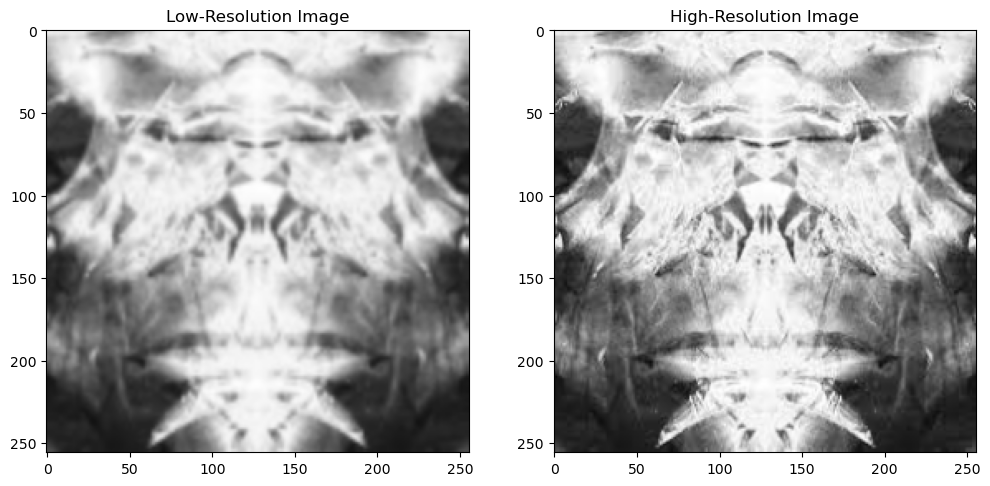

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  15616       ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 p_re_lu (PReLU)                (None, 256, 256, 64  64          ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 conv2d_9 (Conv2D)              (None, 256, 256, 64  36928       ['add_3[0][0]']                  
                                )                                                                 
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 256, 256, 64  256        ['conv2d_9[0][0]']               
 rmalization)                   )                                                                 
                                                                                                  
 p_re_lu_5 (PReLU)              (None, 256, 256, 64  64          ['batch_normalization_8[0][0]']  
                                )                                                                 
                                                                                                  
 conv2d_10

                                )                                                                 
                                                                                                  
 batch_normalization_17 (BatchN  (None, 256, 256, 64  256        ['conv2d_18[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 add_8 (Add)                    (None, 256, 256, 64  0           ['add_7[0][0]',                  
                                )                                 'batch_normalization_17[0][0]'] 
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 64  36928       ['add_8[0][0]']                  
                                )                                                                 
          

 batch_normalization_26 (BatchN  (None, 256, 256, 64  256        ['conv2d_27[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 p_re_lu_14 (PReLU)             (None, 256, 256, 64  64          ['batch_normalization_26[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_28 (Conv2D)             (None, 256, 256, 64  36928       ['p_re_lu_14[0][0]']             
                                )                                                                 
                                                                                                  
 batch_normalization_27 (BatchN  (None, 256, 256, 64  256        ['conv2d_28[0][0]']              
 ormalizat

__________________________________________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_37 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 64)      0         
                                                                 
 conv2d_38 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_33 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)

ValueError: Exception encountered when calling layer "model_1" (type Functional).

Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 131072, but received input with shape (None, 2097152)

Call arguments received by layer "model_1" (type Functional):
  • inputs=tf.Tensor(shape=(None, 1024, 1024, 3), dtype=float32)
  • training=False
  • mask=None

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras import layers
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, PReLU, BatchNormalization, Flatten, UpSampling2D, LeakyReLU, Dense, Input, add
from tqdm import tqdm
from keras.applications import VGG19
from numpy.random import randint

# Residual Block
def res_block(ip):
    res_model = Conv2D(64, (3, 3), padding="same")(ip)
    res_model = BatchNormalization(momentum=0.5)(res_model)
    res_model = PReLU(shared_axes=[1, 2])(res_model)
    
    res_model = Conv2D(64, (3, 3), padding="same")(res_model)
    res_model = BatchNormalization(momentum=0.5)(res_model)
    
    return add([ip, res_model])

# Upscale Block
def upscale_block(ip):
    up_model = Conv2D(256, (3, 3), padding="same")(ip)
    up_model = UpSampling2D(size=2)(up_model)
    up_model = PReLU(shared_axes=[1, 2])(up_model)
    
    return up_model

# Generator Model
def create_gen(gen_ip, num_res_block):
    layers = Conv2D(64, (9, 9), padding="same")(gen_ip)
    layers = PReLU(shared_axes=[1, 2])(layers)

    temp = layers

    for i in range(num_res_block):
        layers = res_block(layers)

    layers = Conv2D(64, (3, 3), padding="same")(layers)
    layers = BatchNormalization(momentum=0.5)(layers)
    layers = add([layers, temp])

    layers = upscale_block(layers)
    layers = upscale_block(layers)

    op = Conv2D(3, (9, 9), padding="same")(layers)

    return Model(inputs=gen_ip, outputs=op)

# Discriminator Block
def discriminator_block(ip, filters, strides=1, bn=True):
    disc_model = Conv2D(filters, (3, 3), strides=strides, padding="same")(ip)
    
    if bn:
        disc_model = BatchNormalization(momentum=0.8)(disc_model)
    
    disc_model = LeakyReLU(alpha=0.2)(disc_model)
    
    return disc_model

# Discriminator Model
def create_disc(disc_ip):
    df = 64
    
    d1 = discriminator_block(disc_ip, df, bn=False)
    d2 = discriminator_block(d1, df, strides=2)
    d3 = discriminator_block(d2, df * 2)
    d4 = discriminator_block(d3, df * 2, strides=2)
    d5 = discriminator_block(d4, df * 4)
    d6 = discriminator_block(d5, df * 4, strides=2)
    d7 = discriminator_block(d6, df * 8)
    d8 = discriminator_block(d7, df * 8, strides=2)
    
    d8_5 = Flatten()(d8)
    d9 = Dense(df * 16)(d8_5)
    d10 = LeakyReLU(alpha=0.2)(d9)
    validity = Dense(1, activation='sigmoid')(d10)

    return Model(disc_ip, validity)

# Build VGG model
def build_vgg(hr_shape):
    vgg = VGG19(weights="imagenet", include_top=False, input_shape=hr_shape)
    return Model(inputs=vgg.inputs, outputs=vgg.layers[10].output)

# Combined Model
def create_comb(gen_model, disc_model, vgg, lr_ip, hr_ip):
    gen_img = gen_model(lr_ip)
    gen_features = vgg(gen_img)
    
    disc_model.trainable = False
    validity = disc_model(gen_img)
    
    return Model(inputs=[lr_ip, hr_ip], outputs=[validity, gen_features])

# Load images
def load_images(n):
    lr_images = []
    hr_images = []

    # Paths
    lr_path = "C:/Users/SHRIHITA RANVEERKAR/CODES/SRGAN/archive (4)/dataset/Raw Data/low_res/"
    hr_path = "C:/Users/SHRIHITA RANVEERKAR/CODES/SRGAN/archive (4)/dataset/Raw Data/high_res/"

    # Load Low-Resolution Images
    lr_list = os.listdir(lr_path)[:n]
    for img_name in lr_list:
        img_lr = cv2.imread(os.path.join(lr_path, img_name))
        if img_lr is None:
            print(f"Error loading image: {img_name}")
            continue
        img_lr = cv2.cvtColor(img_lr, cv2.COLOR_BGR2RGB)
        lr_images.append(img_lr)

    # Load High-Resolution Images
    hr_list = os.listdir(hr_path)[:n]
    for img_name in hr_list:
        img_hr = cv2.imread(os.path.join(hr_path, img_name))
        if img_hr is None:
            print(f"Error loading image: {img_name}")
            continue
        img_hr = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)
        hr_images.append(img_hr)

    return np.array(lr_images), np.array(hr_images)

# Main Execution
n = 5000
lr_images, hr_images = load_images(n)

# Sanity check: view a few images
image_number = randint(0, len(lr_images) - 1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Low-Resolution Image')
plt.imshow(lr_images[image_number])
plt.subplot(122)
plt.title('High-Resolution Image')
plt.imshow(hr_images[image_number])
plt.show()

# Scale values
lr_images = lr_images / 255.0
hr_images = hr_images / 255.0

# Split into train and test
lr_train, lr_test, hr_train, hr_test = train_test_split(lr_images, hr_images, test_size=0.33, random_state=42)

hr_shape = (hr_train.shape[1], hr_train.shape[2], hr_train.shape[3])
lr_shape = (lr_train.shape[1], lr_train.shape[2], lr_train.shape[3])

# Input Layers
lr_ip = Input(shape=lr_shape)
hr_ip = Input(shape=hr_shape)

# Create Models
generator = create_gen(lr_ip, num_res_block=16)
generator.summary()

discriminator = create_disc(hr_ip)
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
discriminator.summary()

vgg = build_vgg((128, 128, 3))
vgg.trainable = False

gan_model = create_comb(generator, discriminator, vgg, lr_ip, hr_ip)
gan_model.compile(loss=["binary_crossentropy", "mse"], loss_weights=[1e-3, 1], optimizer="adam")
gan_model.summary()

# Create batches for training
batch_size = 1  
train_lr_batches = []
train_hr_batches = []
for it in range(len(hr_train) // batch_size):
    start_idx = it * batch_size
    end_idx = start_idx + batch_size
    train_hr_batches.append(hr_train[start_idx:end_idx])
    train_lr_batches.append(lr_train[start_idx:end_idx])

# Training the Model
epochs = 5
for e in range(epochs):
    fake_label = np.zeros((batch_size, 1))  # Fake label
    real_label = np.ones((batch_size, 1))   # Real label

    g_losses = []
    d_losses = []
    
    for b in tqdm(range(len(train_hr_batches))):
        lr_imgs = train_lr_batches[b]
        hr_imgs = train_hr_batches[b]
        
        fake_imgs = generator.predict_on_batch(lr_imgs)  # Generate fake images
        
        # Train Discriminator
        discriminator.trainable = True
        d_loss_gen = discriminator.train_on_batch(fake_imgs, fake_label)
        d_loss_real = discriminator.train_on_batch(hr_imgs, real_label)
        
        discriminator.trainable = False
        
        d_loss = 0.5 * np.add(d_loss_gen, d_loss_real)
        
        image_features = vgg.predict(hr_imgs)  # VGG features for loss
        
        # Train Generator
        g_loss, _, _ = gan_model.train_on_batch([lr_imgs, hr_imgs], [real_label, image_features])
        
        d_losses.append(d_loss)
        g_losses.append(g_loss)
        
    # Average losses
    g_loss_avg = np.mean(g_losses)
    d_loss_avg = np.mean(d_losses)
    
    print(f"Epoch: {e + 1}, Generator Loss: {g_loss_avg}, Discriminator Loss: {d_loss_avg}")

    if (e + 1) % 10 == 0:
        generator.save(f"gen_e_{e + 1}.h5")

# Load the generator model and test it
generator = load_model('gen_e_10.h5', compile=False)

# Select a random example for testing
[X1, X2] = [lr_test[0:1], hr_test[0:1]]  # Adjust indexing for testing as needed
y_pred = generator.predict(X1)

# Show the results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Low-Resolution Image')
plt.imshow(X1[0])
plt.subplot(122)
plt.title('High-Resolution Image')
plt.imshow(y_pred[0])
plt.show()



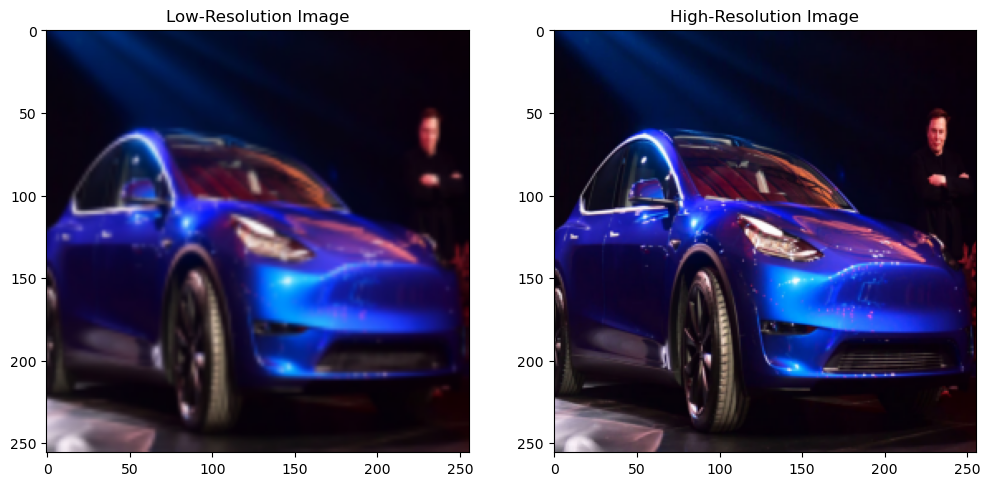

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_90 (Conv2D)             (None, 256, 256, 64  15616       ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 p_re_lu_38 (PReLU)             (None, 256, 256, 64  64          ['conv2d_90[0][0]']              
                                )                                                           

                                                                                                  
 conv2d_99 (Conv2D)             (None, 256, 256, 64  36928       ['add_37[0][0]']                 
                                )                                                                 
                                                                                                  
 batch_normalization_88 (BatchN  (None, 256, 256, 64  256        ['conv2d_99[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 p_re_lu_43 (PReLU)             (None, 256, 256, 64  64          ['batch_normalization_88[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_10

                                )                                                                 
                                                                                                  
 batch_normalization_97 (BatchN  (None, 256, 256, 64  256        ['conv2d_108[0][0]']             
 ormalization)                  )                                                                 
                                                                                                  
 add_42 (Add)                   (None, 256, 256, 64  0           ['add_41[0][0]',                 
                                )                                 'batch_normalization_97[0][0]'] 
                                                                                                  
 conv2d_109 (Conv2D)            (None, 256, 256, 64  36928       ['add_42[0][0]']                 
                                )                                                                 
          

 batch_normalization_106 (Batch  (None, 256, 256, 64  256        ['conv2d_117[0][0]']             
 Normalization)                 )                                                                 
                                                                                                  
 p_re_lu_52 (PReLU)             (None, 256, 256, 64  64          ['batch_normalization_106[0][0]']
                                )                                                                 
                                                                                                  
 conv2d_118 (Conv2D)            (None, 256, 256, 64  36928       ['p_re_lu_52[0][0]']             
                                )                                                                 
                                                                                                  
 batch_normalization_107 (Batch  (None, 256, 256, 64  256        ['conv2d_118[0][0]']             
 Normaliza

__________________________________________________________________________________________________
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_127 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 256, 256, 64)      0         
                                                                 
 conv2d_128 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_113 (Ba  (None, 128, 128, 64)     256       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_19 (LeakyReLU

ValueError: Exception encountered when calling layer "model_7" (type Functional).

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 131072, but received input with shape (None, 2097152)

Call arguments received by layer "model_7" (type Functional):
  • inputs=tf.Tensor(shape=(None, 1024, 1024, 3), dtype=float32)
  • training=False
  • mask=None

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model, load_model
from keras import layers
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, PReLU, BatchNormalization, Flatten, UpSampling2D, LeakyReLU, Dense, Input, add
from tqdm import tqdm
from keras.applications import VGG19
from numpy.random import randint

# Residual Block
def res_block(ip):
    res_model = Conv2D(64, (3, 3), padding="same")(ip)
    res_model = BatchNormalization(momentum=0.5)(res_model)
    res_model = PReLU(shared_axes=[1, 2])(res_model)
    
    res_model = Conv2D(64, (3, 3), padding="same")(res_model)
    res_model = BatchNormalization(momentum=0.5)(res_model)
    
    return add([ip, res_model])

# Upscale Block
def upscale_block(ip):
    up_model = Conv2D(256, (3, 3), padding="same")(ip)
    up_model = UpSampling2D(size=2)(up_model)
    up_model = PReLU(shared_axes=[1, 2])(up_model)
    
    return up_model

# Generator Model
def create_gen(gen_ip, num_res_block):
    layers = Conv2D(64, (9, 9), padding="same")(gen_ip)
    layers = PReLU(shared_axes=[1, 2])(layers)

    temp = layers

    for i in range(num_res_block):
        layers = res_block(layers)

    layers = Conv2D(64, (3, 3), padding="same")(layers)
    layers = BatchNormalization(momentum=0.5)(layers)
    layers = add([layers, temp])

    layers = upscale_block(layers)
    layers = upscale_block(layers)

    op = Conv2D(3, (9, 9), padding="same")(layers)

    return Model(inputs=gen_ip, outputs=op)

# Discriminator Block
def discriminator_block(ip, filters, strides=1, bn=True):
    disc_model = Conv2D(filters, (3, 3), strides=strides, padding="same")(ip)
    
    if bn:
        disc_model = BatchNormalization(momentum=0.8)(disc_model)
    
    disc_model = LeakyReLU(alpha=0.2)(disc_model)
    
    return disc_model

# Discriminator Model
def create_disc(disc_ip):
    df = 64
    
    d1 = discriminator_block(disc_ip, df, bn=False)
    d2 = discriminator_block(d1, df, strides=2)
    d3 = discriminator_block(d2, df * 2)
    d4 = discriminator_block(d3, df * 2, strides=2)
    d5 = discriminator_block(d4, df * 4)
    d6 = discriminator_block(d5, df * 4, strides=2)
    d7 = discriminator_block(d6, df * 8)
    d8 = discriminator_block(d7, df * 8, strides=2)
    
    d8_5 = Flatten()(d8)
    d9 = Dense(df * 16)(d8_5)
    d10 = LeakyReLU(alpha=0.2)(d9)
    validity = Dense(1, activation='sigmoid')(d10)

    return Model(disc_ip, validity)

# Build VGG model
def build_vgg(hr_shape):
    vgg = VGG19(weights="imagenet", include_top=False, input_shape=hr_shape)
    return Model(inputs=vgg.inputs, outputs=vgg.layers[10].output)

# Combined Model
def create_comb(gen_model, disc_model, vgg, lr_ip, hr_ip):
    gen_img = gen_model(lr_ip)
    gen_features = vgg(gen_img)
    
    disc_model.trainable = False
    validity = disc_model(gen_img)
    
    return Model(inputs=[lr_ip, hr_ip], outputs=[validity, gen_features])

# Load images
def load_images(n):
    lr_images = []
    hr_images = []

    # Paths
    lr_path = "C:/Users/SHRIHITA RANVEERKAR/CODES/SRGAN/archive (4)/dataset/Raw Data/low_res/"
    hr_path = "C:/Users/SHRIHITA RANVEERKAR/CODES/SRGAN/archive (4)/dataset/Raw Data/high_res/"

    # Load Low-Resolution Images
    lr_list = os.listdir(lr_path)[:n]
    for img_name in lr_list:
        img_lr = cv2.imread(os.path.join(lr_path, img_name))
        if img_lr is None:
            print(f"Error loading image: {img_name}")
            continue
        img_lr = cv2.cvtColor(img_lr, cv2.COLOR_BGR2RGB)
        lr_images.append(img_lr)

    # Load High-Resolution Images
    hr_list = os.listdir(hr_path)[:n]
    for img_name in hr_list:
        img_hr = cv2.imread(os.path.join(hr_path, img_name))
        if img_hr is None:
            print(f"Error loading image: {img_name}")
            continue
        img_hr = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)
        hr_images.append(img_hr)

    return np.array(lr_images), np.array(hr_images)

# Main Execution
n = 5000
lr_images, hr_images = load_images(n)

# Sanity check: view a few images
image_number = randint(0, len(lr_images) - 1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Low-Resolution Image')
plt.imshow(lr_images[image_number])
plt.subplot(122)
plt.title('High-Resolution Image')
plt.imshow(hr_images[image_number])
plt.show()

# Scale values
lr_images = lr_images / 255.0
hr_images = hr_images / 255.0

# Split into train and test
lr_train, lr_test, hr_train, hr_test = train_test_split(lr_images, hr_images, test_size=0.33, random_state=42)

hr_shape = (hr_train.shape[1], hr_train.shape[2], hr_train.shape[3])
lr_shape = (lr_train.shape[1], lr_train.shape[2], lr_train.shape[3])

# Input Layers
lr_ip = Input(shape=lr_shape)
hr_ip = Input(shape=hr_shape)

# Create Models
generator = create_gen(lr_ip, num_res_block=16)
generator.summary()

discriminator = create_disc(hr_ip)
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
discriminator.summary()

vgg = build_vgg((128, 128, 3))
vgg.trainable = False

gan_model = create_comb(generator, discriminator, vgg, lr_ip, hr_ip)
gan_model.compile(loss=["binary_crossentropy", "mse"], loss_weights=[1e-3, 1], optimizer="adam")
gan_model.summary()

# Create batches for training
batch_size = 1  
train_lr_batches = []
train_hr_batches = []

for it in range(len(hr_train) // batch_size):
    start_idx = it * batch_size
    end_idx = start_idx + batch_size
    train_hr_batches.append(hr_train[start_idx:end_idx])
    train_lr_batches.append(lr_train[start_idx:end_idx])

# Training the Model
epochs = 5
for e in range(epochs):
    fake_label = np.zeros((batch_size, 1))  # Fake label
    real_label = np.ones((batch_size, 1))   # Real label

    g_losses = []
    d_losses = []
    
    for b in tqdm(range(len(train_hr_batches))):
        lr_imgs = train_lr_batches[b]
        hr_imgs = train_hr_batches[b]
        
        fake_imgs = generator.predict_on_batch(lr_imgs)  # Generate fake images
        
        # Train Discriminator
        discriminator.trainable = True
        d_loss_gen = discriminator.train_on_batch(fake_imgs, fake_label)
        d_loss_real = discriminator.train_on_batch(hr_imgs, real_label)
        
        discriminator.trainable = False
        
        d_loss = 0.5 * np.add(d_loss_gen, d_loss_real)
        
        image_features = vgg.predict(hr_imgs)  # VGG features for loss
        
        # Train Generator
        g_loss, _, _ = gan_model.train_on_batch([lr_imgs, hr_imgs], [real_label, image_features])
        
        d_losses.append(d_loss)
        g_losses.append(g_loss)
        
    # Average losses
    g_loss_avg = np.mean(g_losses)
    d_loss_avg = np.mean(d_losses)
    
    print(f"Epoch: {e + 1}, Generator Loss: {g_loss_avg}, Discriminator Loss: {d_loss_avg}")

    if (e + 1) % 10 == 0:
        generator.save(f"gen_e_{e + 1}.h5")

# Save the final model
generator.save("C:/Users/SHRIHITA RANVEERKAR/video/final_generator_model.h5")
print("Final Generator Model saved as final_generator_model.h5")

In [17]:
from tensorflow.keras.models import load_model
generator.save("C:/Users/SHRIHITA RANVEERKAR/video/New folder/final_generator_model.h5")


In [8]:
import os

# Check the current directory
print("Current Directory:", os.getcwd())

# List files in the directory
print("Files in Directory:", os.listdir())


Current Directory: C:\Users\SHRIHITA RANVEERKAR
Files in Directory: ['.anaconda', '.android', '.AndroidStudio3.5', '.atom', '.bashrc', '.bash_profile', '.cache', '.conda', '.condarc', '.continuum', '.dotnet', '.inputrc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.spyder-py3', '.templateengine', '.thumbnails', '.vscode', '1ST GAME', 'address_book.db', 'Anaconda Navigator.lnk', 'anaconda-navigator-app-err-1.txt', 'anaconda-navigator-app-out-1.txt', 'anaconda-navigator-app.bat', 'anaconda-navigator-updater-err-1.txt', 'anaconda-navigator-updater-out-1.txt', 'anaconda-navigator-updater.bat', 'anaconda-navigator.ini', 'anaconda3', 'AndroidStudioProjects', 'ansel', 'AppData', 'Application Data', 'archive (2)', 'Autodesk', 'book', 'Build Resume Parser using Spacy.ipynb', 'churn prediction telco data.ipynb', 'classification.ipynb', 'cluster.ipynb', 'code me', 'CODES', 'coffee responsive website', 'coffee shop', 'contactbook.ipynb', 'Contacts', 'Cookies', 'csvs', '

In [9]:
import os

# Specify the directory to search
directory = "C:/Users/SHRIHITA RANVEERKAR/"
for root, dirs, files in os.walk(directory):
    if "final_generator_model.h5" in files:
        print(f"Found at: {os.path.join(root, 'final_generator_model.h5')}")


In [11]:
import os

def find_file(filename, search_path):
    """
    Searches for a specific file in the given directory and its subdirectories.

    Args:
        filename (str): The name of the file to search for.
        search_path (str): The path of the directory to start searching from.

    Returns:
        list: A list of full paths to all matching files.
    """
    matches = []
    for root, dirs, files in os.walk(search_path):
        if filename in files:
            matches.append(os.path.join(root, filename))
    return matches

# Example usage:
search_path = "C:/Users/SHRIHITA RANVEERKAR/"
filename = "final_generator_model.h5"

found_files = find_file(filename, search_path)

if found_files:
    print(f"File found at:")
    for file in found_files:
        print(file)
else:
    print(f"File '{filename}' not found in {search_path}.")


File 'final_generator_model.h5' not found in C:/Users/SHRIHITA RANVEERKAR/.


In [15]:
from keras.models import load_model
import cv2
import numpy as np

# Load the trained model
generator = load_model("C:/Users/SHRIHITA RANVEERKAR/video/New folder/final_generator_model.h5")


In [19]:
import os
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load the pre-trained generator model
generator = load_model('C:/Users/SHRIHITA RANVEERKAR/video/New folder/final_generator_model.h5', compile=False)

# Function to extract frames from video
def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)
    cap.release()
    return np.array(frames)

# Function to process frames with the generator
def enhance_video(frames, generator):
    enhanced_frames = []
    for frame in tqdm(frames, desc="Enhancing frames"):
        lr_frame = cv2.resize(frame, (64, 64))  # Resize frame to low resolution
        lr_frame = lr_frame / 255.0  # Normalize
        lr_frame = np.expand_dims(lr_frame, axis=0)  # Add batch dimension
        
        # Enhance resolution
        sr_frame = generator.predict(lr_frame)[0]
        sr_frame = np.clip(sr_frame * 255, 0, 255).astype('uint8')  # Rescale and convert to uint8
        
        enhanced_frames.append(sr_frame)
    return np.array(enhanced_frames)

# Function to save enhanced frames back to video
def save_video(frames, output_path, original_video_path):
    # Extract video properties from original video
    cap = cv2.VideoCapture(original_video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    width, height = frames[0].shape[1], frames[0].shape[0]
    cap.release()

    # Initialize VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 format
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    for frame in frames:
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # Convert to BGR for OpenCV
        out.write(frame_bgr)
    
    out.release()

# Main Execution
video_path = 'C:/Users/SHRIHITA RANVEERKAR/video/live_videos/1.mp4'  # Path to input video
output_path = 'C:/Users/SHRIHITA RANVEERKAR/video/live_videos/1_enhanced.mp4'  # Path to save enhanced video

# Step 1: Extract frames
print("Extracting frames...")
frames = extract_frames(video_path)

# Step 2: Enhance resolution
print("Enhancing video resolution...")
enhanced_frames = enhance_video(frames, generator)

# Step 3: Save enhanced video
print("Saving enhanced video...")
save_video(enhanced_frames, output_path, video_path)

print(f"Enhanced video saved at: {output_path}")


Extracting frames...
Enhancing video resolution...


Enhancing frames:   0%|          | 0/210 [00:00<?, ?it/s]


ValueError: in user code:

    File "C:\Users\SHRIHITA RANVEERKAR\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\SHRIHITA RANVEERKAR\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\SHRIHITA RANVEERKAR\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\SHRIHITA RANVEERKAR\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\SHRIHITA RANVEERKAR\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\SHRIHITA RANVEERKAR\AppData\Roaming\Python\Python310\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_6" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(None, 64, 64, 3)


In [20]:
import os
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load the pre-trained generator model
generator = load_model('C:/Users/SHRIHITA RANVEERKAR/video/New folder/final_generator_model.h5', compile=False)

# Function to extract frames from video
def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
        frames.append(frame)
    cap.release()
    return np.array(frames)

# Function to process frames with the generator
def enhance_video(frames, generator):
    enhanced_frames = []
    for frame in tqdm(frames, desc="Enhancing frames"):
        # Resize frame to match generator's expected input size (256x256 in this case)
        lr_frame = cv2.resize(frame, (256, 256))  
        lr_frame = lr_frame / 255.0  # Normalize to [0, 1]
        lr_frame = np.expand_dims(lr_frame, axis=0)  # Add batch dimension
        
        # Enhance resolution
        sr_frame = generator.predict(lr_frame)[0]  # Model expects input batch
        sr_frame = np.clip(sr_frame * 255, 0, 255).astype('uint8')  # Convert back to [0, 255]
        
        # Resize back to original frame size
        sr_frame = cv2.resize(sr_frame, (frame.shape[1], frame.shape[0]))
        enhanced_frames.append(sr_frame)
    return np.array(enhanced_frames)

# Function to save enhanced frames back to video
def save_video(frames, output_path, original_video_path):
    # Extract video properties from original video
    cap = cv2.VideoCapture(original_video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    width, height = frames[0].shape[1], frames[0].shape[0]
    cap.release()

    # Initialize VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 format
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    for frame in frames:
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # Convert to BGR for OpenCV
        out.write(frame_bgr)
    
    out.release()

# Main Execution
video_path = 'C:/Users/SHRIHITA RANVEERKAR/video/live_videos/1.mp4'  # Path to input video
output_path = 'C:/Users/SHRIHITA RANVEERKAR/video/live_videos/1_enhanced.mp4'  # Path to save enhanced video

# Step 1: Extract frames
print("Extracting frames...")
frames = extract_frames(video_path)

# Step 2: Enhance resolution
print("Enhancing video resolution...")
enhanced_frames = enhance_video(frames, generator)

# Step 3: Save enhanced video
print("Saving enhanced video...")
save_video(enhanced_frames, output_path, video_path)

print(f"Enhanced video saved at: {output_path}")


Extracting frames...
Enhancing video resolution...


Enhancing frames:   0%|          | 0/210 [00:00<?, ?it/s]

1/1 [==============================] - 7s 7s/step


Enhancing frames:   0%|          | 1/210 [00:06<23:02,  6.61s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   1%|          | 2/210 [00:12<21:26,  6.19s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   1%|▏         | 3/210 [00:18<20:49,  6.04s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   2%|▏         | 4/210 [00:24<20:39,  6.02s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   2%|▏         | 5/210 [00:30<20:53,  6.11s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   3%|▎         | 6/210 [00:36<20:19,  5.98s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   3%|▎         | 7/210 [00:42<19:53,  5.88s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:   4%|▍         | 8/210 [00:47<19:20,  5.74s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   4%|▍         | 9/210 [00:53<19:30,  5.82s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   5%|▍         | 10/210 [00:59<19:35,  5.88s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   5%|▌         | 11/210 [01:05<19:28,  5.87s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   6%|▌         | 12/210 [01:11<19:26,  5.89s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   6%|▌         | 13/210 [01:17<19:27,  5.93s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   7%|▋         | 14/210 [01:23<19:46,  6.05s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   7%|▋         | 15/210 [01:29<19:45,  6.08s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   8%|▊         | 16/210 [01:35<19:19,  5.98s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:   8%|▊         | 17/210 [01:42<20:00,  6.22s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   9%|▊         | 18/210 [01:48<20:13,  6.32s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:   9%|▉         | 19/210 [01:54<19:28,  6.12s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  10%|▉         | 20/210 [02:00<19:03,  6.02s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  10%|█         | 21/210 [02:06<18:47,  5.97s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  10%|█         | 22/210 [02:11<18:30,  5.91s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  11%|█         | 23/210 [02:18<18:44,  6.02s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  11%|█▏        | 24/210 [02:23<18:18,  5.91s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  12%|█▏        | 25/210 [02:29<18:08,  5.88s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  12%|█▏        | 26/210 [02:35<17:53,  5.83s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  13%|█▎        | 27/210 [02:40<17:27,  5.72s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  13%|█▎        | 28/210 [02:46<17:17,  5.70s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  14%|█▍        | 29/210 [02:52<17:09,  5.69s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  14%|█▍        | 30/210 [02:58<17:30,  5.84s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  15%|█▍        | 31/210 [03:04<17:59,  6.03s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  15%|█▌        | 32/210 [03:11<18:12,  6.14s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  16%|█▌        | 33/210 [03:16<17:33,  5.95s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  16%|█▌        | 34/210 [03:22<17:10,  5.85s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  17%|█▋        | 35/210 [03:28<16:55,  5.80s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  17%|█▋        | 36/210 [03:33<16:33,  5.71s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  18%|█▊        | 37/210 [03:39<16:27,  5.71s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  18%|█▊        | 38/210 [03:45<17:00,  5.93s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  19%|█▊        | 39/210 [03:51<17:12,  6.04s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  19%|█▉        | 40/210 [03:59<18:04,  6.38s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  20%|█▉        | 41/210 [04:05<17:36,  6.25s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  20%|██        | 42/210 [04:11<17:28,  6.24s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  20%|██        | 43/210 [04:17<16:57,  6.09s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  21%|██        | 44/210 [04:23<16:46,  6.07s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  21%|██▏       | 45/210 [04:30<17:43,  6.44s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  22%|██▏       | 46/210 [04:36<17:31,  6.41s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  22%|██▏       | 47/210 [04:42<17:14,  6.35s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  23%|██▎       | 48/210 [04:48<16:49,  6.23s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  23%|██▎       | 49/210 [04:54<16:22,  6.10s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  24%|██▍       | 50/210 [05:00<16:21,  6.13s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  24%|██▍       | 51/210 [05:06<15:59,  6.03s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  25%|██▍       | 52/210 [05:12<16:02,  6.09s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  25%|██▌       | 53/210 [05:18<15:48,  6.04s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  26%|██▌       | 54/210 [05:24<15:23,  5.92s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  26%|██▌       | 55/210 [05:30<15:28,  5.99s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  27%|██▋       | 56/210 [05:36<15:29,  6.04s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  27%|██▋       | 57/210 [05:43<15:56,  6.25s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  28%|██▊       | 58/210 [05:50<16:26,  6.49s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  28%|██▊       | 59/210 [05:57<16:53,  6.72s/it]

1/1 [==============================] - 8s 8s/step


Enhancing frames:  29%|██▊       | 60/210 [06:05<17:54,  7.16s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  29%|██▉       | 61/210 [06:13<18:04,  7.28s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  30%|██▉       | 62/210 [06:20<17:51,  7.24s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  30%|███       | 63/210 [06:28<17:53,  7.30s/it]

1/1 [==============================] - 8s 8s/step


Enhancing frames:  30%|███       | 64/210 [06:35<18:08,  7.46s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  31%|███       | 65/210 [06:42<17:18,  7.16s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  31%|███▏      | 66/210 [06:49<17:12,  7.17s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  32%|███▏      | 67/210 [06:55<15:58,  6.70s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  32%|███▏      | 68/210 [07:00<15:00,  6.34s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  33%|███▎      | 69/210 [07:07<14:56,  6.36s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  33%|███▎      | 70/210 [07:12<14:22,  6.16s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  34%|███▍      | 71/210 [07:18<14:01,  6.05s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  34%|███▍      | 72/210 [07:25<14:14,  6.19s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  35%|███▍      | 73/210 [07:32<14:54,  6.53s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  35%|███▌      | 74/210 [07:39<15:16,  6.74s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  36%|███▌      | 75/210 [07:45<14:45,  6.56s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  36%|███▌      | 76/210 [07:52<14:57,  6.70s/it]

1/1 [==============================] - 8s 8s/step


Enhancing frames:  37%|███▋      | 77/210 [08:00<15:45,  7.11s/it]

1/1 [==============================] - 8s 8s/step


Enhancing frames:  37%|███▋      | 78/210 [08:09<16:21,  7.44s/it]

1/1 [==============================] - 8s 8s/step


Enhancing frames:  38%|███▊      | 79/210 [08:16<16:24,  7.52s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  38%|███▊      | 80/210 [08:23<15:39,  7.23s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  39%|███▊      | 81/210 [08:29<14:47,  6.88s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  39%|███▉      | 82/210 [08:35<14:14,  6.68s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  40%|███▉      | 83/210 [08:41<13:45,  6.50s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  40%|████      | 84/210 [08:47<13:13,  6.30s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  40%|████      | 85/210 [08:53<12:52,  6.18s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  41%|████      | 86/210 [08:59<12:34,  6.08s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  41%|████▏     | 87/210 [09:05<12:28,  6.08s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  42%|████▏     | 88/210 [09:11<12:17,  6.05s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  42%|████▏     | 89/210 [09:17<12:17,  6.10s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  43%|████▎     | 90/210 [09:24<12:50,  6.42s/it]

1/1 [==============================] - 8s 8s/step


Enhancing frames:  43%|████▎     | 91/210 [09:32<13:46,  6.95s/it]

1/1 [==============================] - 8s 8s/step


Enhancing frames:  44%|████▍     | 92/210 [09:40<14:17,  7.27s/it]

1/1 [==============================] - 8s 8s/step


Enhancing frames:  44%|████▍     | 93/210 [09:49<14:56,  7.66s/it]

1/1 [==============================] - 8s 8s/step


Enhancing frames:  45%|████▍     | 94/210 [09:57<15:03,  7.79s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  45%|████▌     | 95/210 [10:04<14:27,  7.54s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  46%|████▌     | 96/210 [10:11<14:07,  7.44s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  46%|████▌     | 97/210 [10:17<13:17,  7.06s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  47%|████▋     | 98/210 [10:24<13:01,  6.98s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  47%|████▋     | 99/210 [10:31<12:40,  6.86s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  48%|████▊     | 100/210 [10:37<11:56,  6.52s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  48%|████▊     | 101/210 [10:43<11:44,  6.46s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  49%|████▊     | 102/210 [10:50<12:07,  6.74s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  49%|████▉     | 103/210 [10:56<11:38,  6.53s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  50%|████▉     | 104/210 [11:02<11:08,  6.30s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  50%|█████     | 105/210 [11:08<10:45,  6.15s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  50%|█████     | 106/210 [11:14<10:26,  6.02s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  51%|█████     | 107/210 [11:19<10:13,  5.96s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  51%|█████▏    | 108/210 [11:25<10:03,  5.92s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  52%|█████▏    | 109/210 [11:32<10:26,  6.20s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  52%|█████▏    | 110/210 [11:39<10:48,  6.48s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  53%|█████▎    | 111/210 [11:45<10:24,  6.31s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  53%|█████▎    | 112/210 [11:52<10:33,  6.47s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  54%|█████▍    | 113/210 [11:59<10:47,  6.68s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  54%|█████▍    | 114/210 [12:05<10:16,  6.42s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  55%|█████▍    | 115/210 [12:11<10:03,  6.35s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  55%|█████▌    | 116/210 [12:17<09:40,  6.17s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  56%|█████▌    | 117/210 [12:23<09:36,  6.20s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  56%|█████▌    | 118/210 [12:29<09:25,  6.15s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  57%|█████▋    | 119/210 [12:35<09:10,  6.04s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  57%|█████▋    | 120/210 [12:42<09:24,  6.27s/it]

1/1 [==============================] - 8s 8s/step


Enhancing frames:  58%|█████▊    | 121/210 [12:50<10:05,  6.81s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  58%|█████▊    | 122/210 [12:57<10:19,  7.04s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  59%|█████▊    | 123/210 [13:04<10:01,  6.91s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  59%|█████▉    | 124/210 [13:10<09:25,  6.58s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  60%|█████▉    | 125/210 [13:16<08:56,  6.31s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  60%|██████    | 126/210 [13:21<08:28,  6.05s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  60%|██████    | 127/210 [13:27<08:23,  6.07s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  61%|██████    | 128/210 [13:34<08:26,  6.18s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  61%|██████▏   | 129/210 [13:40<08:22,  6.21s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  62%|██████▏   | 130/210 [13:46<08:18,  6.23s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  62%|██████▏   | 131/210 [13:52<08:10,  6.21s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  63%|██████▎   | 132/210 [14:00<08:36,  6.62s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  63%|██████▎   | 133/210 [14:06<08:20,  6.50s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  64%|██████▍   | 134/210 [14:12<07:58,  6.29s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  64%|██████▍   | 135/210 [14:19<08:04,  6.47s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  65%|██████▍   | 136/210 [14:25<07:55,  6.43s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  65%|██████▌   | 137/210 [14:31<07:38,  6.28s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  66%|██████▌   | 138/210 [14:37<07:29,  6.24s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  66%|██████▌   | 139/210 [14:44<07:27,  6.31s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  67%|██████▋   | 140/210 [14:50<07:16,  6.23s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  67%|██████▋   | 141/210 [14:57<07:26,  6.47s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  68%|██████▊   | 142/210 [15:03<07:12,  6.36s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  68%|██████▊   | 143/210 [15:10<07:12,  6.45s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  69%|██████▊   | 144/210 [15:16<07:06,  6.46s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  69%|██████▉   | 145/210 [15:22<06:53,  6.37s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  70%|██████▉   | 146/210 [15:29<06:49,  6.40s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  70%|███████   | 147/210 [15:35<06:39,  6.35s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  70%|███████   | 148/210 [15:41<06:25,  6.22s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  71%|███████   | 149/210 [15:46<06:10,  6.07s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  71%|███████▏  | 150/210 [15:52<06:00,  6.01s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  72%|███████▏  | 151/210 [15:58<05:50,  5.95s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  72%|███████▏  | 152/210 [16:04<05:42,  5.91s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  73%|███████▎  | 153/210 [16:10<05:38,  5.93s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  73%|███████▎  | 154/210 [16:16<05:36,  6.02s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  74%|███████▍  | 155/210 [16:22<05:28,  5.98s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  74%|███████▍  | 156/210 [16:28<05:28,  6.08s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  75%|███████▍  | 157/210 [16:35<05:24,  6.13s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  75%|███████▌  | 158/210 [16:41<05:16,  6.08s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  76%|███████▌  | 159/210 [16:46<05:04,  5.98s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  76%|███████▌  | 160/210 [16:52<04:53,  5.87s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  77%|███████▋  | 161/210 [16:58<04:51,  5.96s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  77%|███████▋  | 162/210 [17:04<04:48,  6.02s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  78%|███████▊  | 163/210 [17:10<04:43,  6.03s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  78%|███████▊  | 164/210 [17:16<04:38,  6.05s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  79%|███████▊  | 165/210 [17:22<04:26,  5.91s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  79%|███████▉  | 166/210 [17:28<04:21,  5.93s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  80%|███████▉  | 167/210 [17:34<04:09,  5.81s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  80%|████████  | 168/210 [17:39<04:00,  5.73s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  80%|████████  | 169/210 [17:45<03:56,  5.77s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  81%|████████  | 170/210 [17:51<03:49,  5.75s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  81%|████████▏ | 171/210 [17:56<03:44,  5.75s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  82%|████████▏ | 172/210 [18:02<03:40,  5.80s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  82%|████████▏ | 173/210 [18:09<03:42,  6.02s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  83%|████████▎ | 174/210 [18:15<03:38,  6.07s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  83%|████████▎ | 175/210 [18:21<03:35,  6.15s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  84%|████████▍ | 176/210 [18:28<03:29,  6.17s/it]

1/1 [==============================] - 7s 7s/step


Enhancing frames:  84%|████████▍ | 177/210 [18:34<03:27,  6.30s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  85%|████████▍ | 178/210 [18:41<03:22,  6.33s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  85%|████████▌ | 179/210 [18:47<03:14,  6.29s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  86%|████████▌ | 180/210 [18:53<03:06,  6.23s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  86%|████████▌ | 181/210 [18:59<02:57,  6.13s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  87%|████████▋ | 182/210 [19:05<02:52,  6.16s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  87%|████████▋ | 183/210 [19:11<02:43,  6.05s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  88%|████████▊ | 184/210 [19:17<02:35,  5.97s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  88%|████████▊ | 185/210 [19:22<02:27,  5.92s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  89%|████████▊ | 186/210 [19:28<02:20,  5.86s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  89%|████████▉ | 187/210 [19:34<02:13,  5.82s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  90%|████████▉ | 188/210 [19:40<02:07,  5.79s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  90%|█████████ | 189/210 [19:45<02:00,  5.72s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  90%|█████████ | 190/210 [19:51<01:53,  5.68s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  91%|█████████ | 191/210 [19:56<01:46,  5.61s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  91%|█████████▏| 192/210 [20:02<01:40,  5.61s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  92%|█████████▏| 193/210 [20:08<01:36,  5.70s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  92%|█████████▏| 194/210 [20:14<01:32,  5.76s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  93%|█████████▎| 195/210 [20:19<01:26,  5.73s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  93%|█████████▎| 196/210 [20:25<01:20,  5.78s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  94%|█████████▍| 197/210 [20:31<01:14,  5.71s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  94%|█████████▍| 198/210 [20:36<01:09,  5.75s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  95%|█████████▍| 199/210 [20:43<01:04,  5.84s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  95%|█████████▌| 200/210 [20:48<00:57,  5.71s/it]

1/1 [==============================] - 5s 5s/step


Enhancing frames:  96%|█████████▌| 201/210 [20:53<00:51,  5.67s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  96%|█████████▌| 202/210 [21:00<00:46,  5.85s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  97%|█████████▋| 203/210 [21:06<00:40,  5.82s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  97%|█████████▋| 204/210 [21:12<00:35,  5.94s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  98%|█████████▊| 205/210 [21:18<00:29,  5.91s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  98%|█████████▊| 206/210 [21:23<00:23,  5.91s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  99%|█████████▊| 207/210 [21:30<00:17,  5.95s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames:  99%|█████████▉| 208/210 [21:35<00:11,  5.90s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames: 100%|█████████▉| 209/210 [21:41<00:05,  5.92s/it]

1/1 [==============================] - 6s 6s/step


Enhancing frames: 100%|██████████| 210/210 [21:47<00:00,  6.23s/it]

Saving enhanced video...


Enhanced video saved at: C:/Users/SHRIHITA RANVEERKAR/video/live_videos/1_enhanced.mp4
